### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [1]:
import matplotlib # импортируем библиотеку
import matplotlib.pyplot as plt # основной модуль
from matplotlib import cm
from collections import OrderedDict
import datetime as DT

import numpy as np # уже знакомые нам библиотеки
import pandas as pd

from pandas.plotting import register_matplotlib_converters # для корректной конвертации времени
register_matplotlib_converters() 

import seaborn as sns # наводим красоту
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline


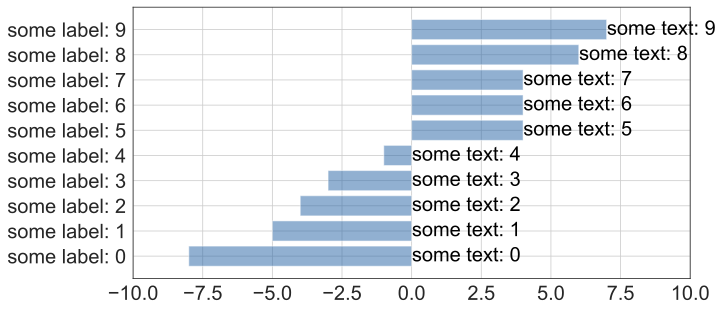

In [2]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):

    fig, ax = plt.subplots() #кортеж, содержащий фигуру и объекты осей
    fig.set_figwidth(figsize[0]) #ширина 
    fig.set_figheight(figsize[1]) # и высота фигуры

    y_pos = np.arange(len(yticks_labels)) #подписи по оси у
    grafik = ax.barh( y_pos, bars_length,  color = '#2563A5', tick_label = yticks_labels, alpha=0.5) #рисуем barh
    ax.set_xlim(-10,10) # пределы просмотра по оси X
    
    ax = plt.gca() #надписи вдоль оси у
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    #делаем подписи к барам
    for i in range(len(bars_length)):
        if bars_length[i]>0:
            ax.text(bars_length[i] + 0.01, i, labels[i], color = "black", va="center", fontsize =20)
        else: ax.text(0.01, i, labels[i], color = "black", va="center", fontsize =20)


    plt.grid(True)
    plt.show()

# Заданная сигнатура функции    
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)] #подписи по оси у
labels = ['some text: {}'.format(i) for i in range(10)] #подписи баров
figsize = (10, 5)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

In [ ]:
#ЧЕРНОВИК_рисуем график без функции
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]

plt.figure(figsize=(20, 10)) # размер канваса
plt.barh(labels, bars_length, alpha=0.5)


ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

#делаем подписи к барам
for i in range(len(bars_length)):
    if bars_length[i]>0:
        ax.text(bars_length[i] + 0.01, i, labels[i], color = "black", va="center", fontsize =20)
    else: ax.text(0.01, i, labels[i], color = "black", va="center", fontsize =20)


plt.grid(True)
plt.show()

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

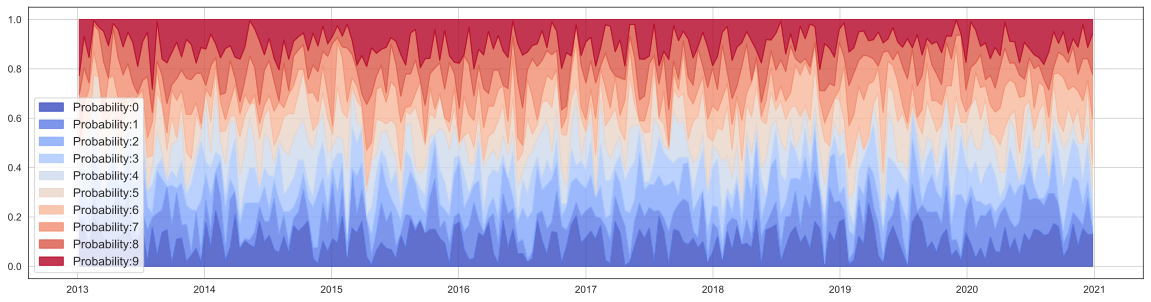

In [3]:
def plot_time_probabilities(probabilities_in_time, figsize):
    plt.figure(figsize=figsize)
    ax = plt.gca()
    
    num = len(probabilities_in_time.columns)
    cmap = plt.cm.coolwarm(np.linspace(0, 1, num)) #палетка цветов
       
    for i in range(num):
        lower_topic = probabilities_in_time.loc[:, 0:i-1].sum(axis =1) #нижний
        upper_topic = lower_topic + probabilities_in_time[i] #верхний
 #  верхний можно задать еще так: upper_topic = probabilities_in_time.loc[:, 0:i].sum(axis =1)

        #заполняем цветом между нижним и верхним
        plt.fill_between(probabilities_in_time.index, lower_topic, upper_topic, color=cmap[i], alpha=0.8, label = "Probability:{}".format(i))
        lower_topic = upper_topic          
       
    plt.legend(prop={'size': 12}, loc = 3) #размер и местоположение легенды
    plt.grid(True)
    plt.show()

# Заданная сигнатура функции:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

In [ ]:
#probabilities_in_time

In [ ]:
#a = probabilities_in_time.loc[:, 0:2-1] #срез двух столбцов
#a

In [ ]:
#b = probabilities_in_time.loc[:, 0:2-1].sum(axis =1) #столбец с суммой их значений
#b

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

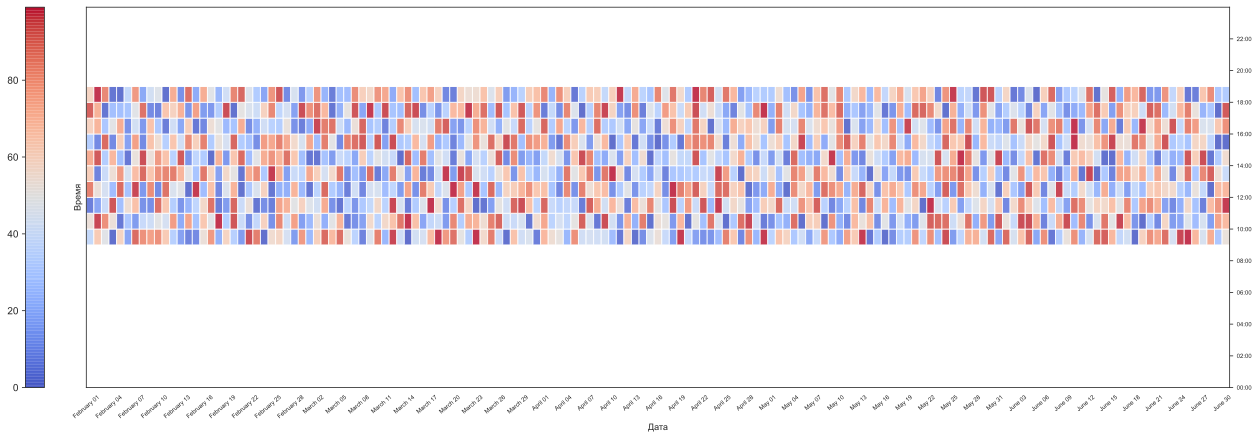

In [13]:
def plot_intraday_ts(intraday_ts, figsize):
    
    #оставляем целые дни, состоящие из 24 часов (исключается последняя строка)
    intraday_ts = intraday_ts[:(len(intraday_ts)//24)*24] 
    #превращаем в np.array и меняем форму массива,формируем 24 столбца (-1, т.к. кол-во строк неизвестно)
    a = np.array(intraday_ts.values).reshape(-1, 24) 
    #превращаем во фрейм, индексы фрейма = уникальные даты, названия столбцов = уникальное время
    intraday_ts = pd.DataFrame(a, index = np.unique(intraday_ts.index.date), columns = np.unique(intraday_ts.index.time))
    #транспонируем фрейм:переставляем индексы и столбцы
    intraday_ts = intraday_ts.T
    
    num = len(intraday_ts)
    cm = plt.cm.coolwarm # тепловая карта
    fig, ax = plt.subplots()
    fig.set_figwidth(figsize[0])
    fig.set_figheight(figsize[1])
    
    #рисуем тепловую карту
    picter = ax.pcolormesh(intraday_ts, edgecolors = 'white', cmap = cm, alpha = 0.8)
    
    #даем название осям х и у
    plt.ylabel('Время', fontsize=9) #название оси х
    plt.xlabel('Дата', fontsize=9) #название оси у

    #подписи 
    # по оси х (даты и мес): числа с шагом 3 
    ax.set_xticks(range(0, len(intraday_ts.columns), 3)) 
    # превращаем ряд чисел в месяц и дату: 
    # strftime - преобразование по формату: %B – полное название месяца %d – день месяца (с 01 по 31)
    # rotation=40 - наклод надписей в 40 градусов
    ax.set_xticklabels([intraday_ts.columns[i].strftime('%B %d') for i in range(0,len(intraday_ts.columns), 3)], rotation=40, fontsize = 6)
    
    # по оси y (время): числа с шагом 2 
    ax.set_yticks(range(0, len(intraday_ts.index), 2))
    ax.set_yticklabels([intraday_ts.index[i].strftime('%H:%M') for i in range(0, len(intraday_ts.index), 2)], fontsize = 6 )
    #перенесим время по оси у вправо
    ax.yaxis.set_ticks_position('right')
        
    #рисуем "тепловой столбец"
    col_bar = plt.colorbar(picter,ax=[ax],location='left', pad = 0.03) 
    
    plt.show()
    
# Заданная сигнатура функции:
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)
plot_intraday_ts(intraday_ts, figsize)       

In [4]:
# ЧЕРНОВИКИ И РАЗБОР МЕТОДОВ (МОИ ЗАМЕТКИ)

#создаем набор данных
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts

2020-02-01 00:00:00    85
2020-02-01 01:00:00     6
2020-02-01 02:00:00    11
2020-02-01 03:00:00    91
2020-02-01 04:00:00    97
                       ..
2020-06-30 20:00:00    12
2020-06-30 21:00:00    19
2020-06-30 22:00:00     9
2020-06-30 23:00:00    85
2020-07-01 00:00:00    99
Freq: H, Length: 3625, dtype: int32

In [5]:
#добавляем пропущенные значения
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
intraday_ts

2020-02-01 00:00:00   NaN
2020-02-01 01:00:00   NaN
2020-02-01 02:00:00   NaN
2020-02-01 03:00:00   NaN
2020-02-01 04:00:00   NaN
                       ..
2020-06-30 20:00:00   NaN
2020-06-30 21:00:00   NaN
2020-06-30 22:00:00   NaN
2020-06-30 23:00:00   NaN
2020-07-01 00:00:00   NaN
Freq: H, Length: 3625, dtype: float64

In [6]:
intraday_ts = intraday_ts[:(len(intraday_ts)//24)*24]
intraday_ts

2020-02-01 00:00:00   NaN
2020-02-01 01:00:00   NaN
2020-02-01 02:00:00   NaN
2020-02-01 03:00:00   NaN
2020-02-01 04:00:00   NaN
                       ..
2020-06-30 19:00:00   NaN
2020-06-30 20:00:00   NaN
2020-06-30 21:00:00   NaN
2020-06-30 22:00:00   NaN
2020-06-30 23:00:00   NaN
Freq: H, Length: 3624, dtype: float64

In [7]:
a = np.array(intraday_ts.values).reshape(-1, 24)
a

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [8]:
intraday_ts.index.date

array([datetime.date(2020, 2, 1), datetime.date(2020, 2, 1),
       datetime.date(2020, 2, 1), ..., datetime.date(2020, 6, 30),
       datetime.date(2020, 6, 30), datetime.date(2020, 6, 30)],
      dtype=object)

In [9]:
intraday_ts = pd.DataFrame(a, index = np.unique(intraday_ts.index.date), columns = np.unique(intraday_ts.index.time))
intraday_ts

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,...,82.0,81.0,24.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,...,32.0,39.0,61.0,41.0,98.0,NaN,NaN,NaN,NaN,NaN
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,...,19.0,26.0,58.0,20.0,62.0,NaN,NaN,NaN,NaN,NaN
2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,...,89.0,22.0,76.0,65.0,68.0,NaN,NaN,NaN,NaN,NaN
2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,...,65.0,56.0,78.0,8.0,27.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,...,18.0,58.0,54.0,33.0,32.0,NaN,NaN,NaN,NaN,NaN
2020-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,...,99.0,4.0,40.0,71.0,20.0,NaN,NaN,NaN,NaN,NaN
2020-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,95.0,27.0,87.0,73.0,29.0,NaN,NaN,NaN,NaN,NaN
2020-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,...,59.0,23.0,37.0,20.0,50.0,NaN,NaN,NaN,NaN,NaN


In [10]:
intraday_ts = intraday_ts.T
intraday_ts

,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,...,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30
00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:00:00,75.0,15.0,38.0,52.0,58.0,20.0,90.0,68.0,33.0,31.0,...,64.0,81.0,7.0,80.0,34.0,52.0,87.0,6.0,23.0,80.0


In [11]:
intraday_ts = intraday_ts.T

In [12]:
intraday_ts

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,...,82.0,81.0,24.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,...,32.0,39.0,61.0,41.0,98.0,NaN,NaN,NaN,NaN,NaN
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,...,19.0,26.0,58.0,20.0,62.0,NaN,NaN,NaN,NaN,NaN
2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,...,89.0,22.0,76.0,65.0,68.0,NaN,NaN,NaN,NaN,NaN
2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,...,65.0,56.0,78.0,8.0,27.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,...,18.0,58.0,54.0,33.0,32.0,NaN,NaN,NaN,NaN,NaN
2020-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,...,99.0,4.0,40.0,71.0,20.0,NaN,NaN,NaN,NaN,NaN
2020-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,95.0,27.0,87.0,73.0,29.0,NaN,NaN,NaN,NaN,NaN
2020-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,...,59.0,23.0,37.0,20.0,50.0,NaN,NaN,NaN,NaN,NaN
